In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import unidecode
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('C:/Users/Fabian/Documents/dh/contenido/ds_blend_students_2020/TP3/data/aug_train.csv')
#C:/Users/Administrador.000/Documents/DH/Contenidook/ds_blend_students_2020/Desafio3/aug_train

In [3]:
df.shape

(19158, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.target.value_counts(normalize=True)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

In [6]:
df.gender.value_counts(normalize=True)

Male      0.902457
Female    0.084505
Other     0.013038
Name: gender, dtype: float64

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
df.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [9]:
df.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [10]:
df.training_hours.value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [11]:
df.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [12]:
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [13]:
df.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [14]:
df.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [15]:
df.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [16]:
df.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [17]:
df.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_111       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [18]:
df.city_development_index.value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [19]:
#El indice es un atributo de la ciudad por ende se puede eliminar
check_corr=df.groupby("city")["city_development_index"].nunique()
#check_corr.mean()
check_corr

city
city_1      1
city_10     1
city_100    1
city_101    1
city_102    1
           ..
city_93     1
city_94     1
city_97     1
city_98     1
city_99     1
Name: city_development_index, Length: 123, dtype: int64

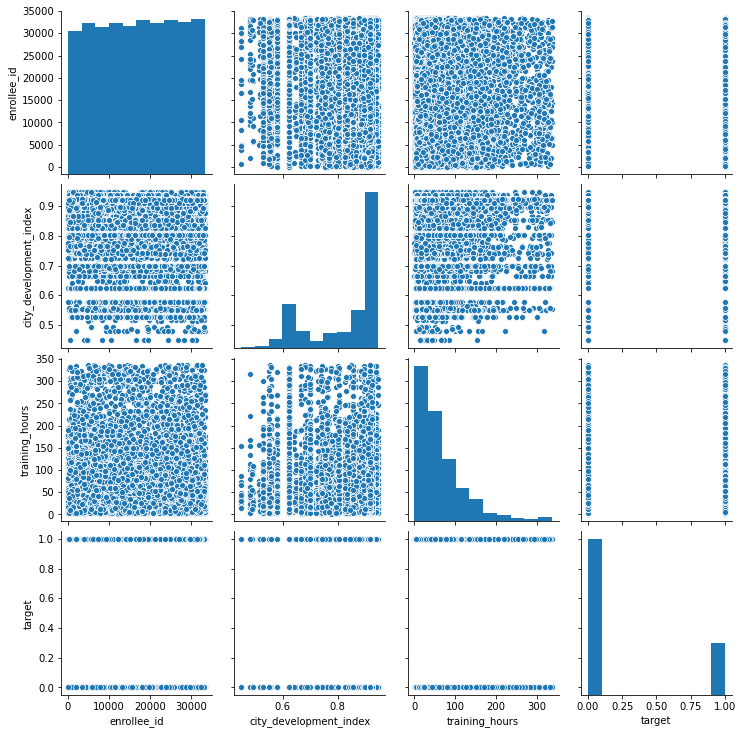

In [20]:
sns.pairplot(df)

In [21]:
#no hay duplicados
duplicated = df.duplicated(subset=["enrollee_id"])
any(duplicated)

False

In [22]:
df_clean=df.drop(["enrollee_id"],axis=1)

In [23]:
#no hay duplicados
duplicated1 = df_clean.duplicated()
any(duplicated1)

True

In [24]:
duplicated1.sum()

49

In [25]:
df_unique = df_clean.drop_duplicates(keep="first")
df_unique.shape

(19109, 13)

In [26]:
df_unique = df_unique.dropna(subset=["enrolled_university","education_level","experience","last_new_job"],axis = 0)
df_unique.shape


(17965, 13)

In [27]:
CT=df_unique.company_type.fillna("Not defined")

In [28]:
CS=df_unique.company_size.fillna("Not defined")

In [29]:
Sex=df_unique.gender.fillna("Not defined")

In [30]:
MD= df_unique.major_discipline.fillna("STEM")

In [31]:
df_unique["gender"]=Sex

In [32]:
df_unique['major_discipline']=MD

In [33]:
df_unique['company_size']=CS

In [34]:
df_unique['company_type']=CT

In [35]:
df_unique.isnull().sum()/df_unique.shape[0]

city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [36]:
df_unique.target.value_counts(normalize=True)

0.0    0.754578
1.0    0.245422
Name: target, dtype: float64

In [37]:
#falta hot encoder, separar en train/test,escalar

In [38]:
#Separamos en Train/test
X = df_unique.drop('target', axis = 1)
Y = df_unique[['target']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237,stratify=Y)

In [39]:
#Hot encoder para columnas categóricas (crear dummies)
categorical_columns = [col for col in df_unique.columns if df[col].dtypes == 'object']
encoder_categories = []

for col in categorical_columns:    
    col_categories = df_unique[col].unique()
    encoder_categories.append(col_categories)

encoder = OneHotEncoder(categories = encoder_categories, sparse=False)

encoder = encoder.fit(X_train[categorical_columns])
    


X_train_encoded = encoder.transform(X_train[categorical_columns])
X_train_categorical = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names(categorical_columns))
#X_train_categorical.sample(5)

X_test_encoded = encoder.transform(X_test[categorical_columns])
X_test_categorical = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names(categorical_columns))
X_test_categorical.head()

,city_city_103,city_city_40,city_city_21,city_city_162,city_city_176,city_city_160,city_city_46,city_city_61,city_city_114,city_city_13,...,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job_1,last_new_job_>4,last_new_job_never,last_new_job_4,last_new_job_3,last_new_job_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
#Escalar columnas no categóricas o numéricas
non_categorical_columns = [col for col in X_train.columns if col not in categorical_columns]
non_categorical_columns

std_sclr = StandardScaler()
std_sclr_trained = std_sclr.fit(X_train[non_categorical_columns])
X_train_numerical = std_sclr_trained.transform(X_train[non_categorical_columns])
X_train_numerical_scaled = pd.DataFrame(X_train_numerical, columns = non_categorical_columns)
#X_train_numerical_scaled.head()

X_test_numerical = std_sclr_trained.transform(X_test[non_categorical_columns])
X_test_numerical_scaled = pd.DataFrame(X_test_numerical, columns = non_categorical_columns)
X_test_numerical_scaled.head()

,city_development_index,training_hours
0,0.774467,0.514427
1,-1.690053,2.961203
2,-1.690053,1.788091
3,-0.449633,-0.122405
4,0.195060,-0.993859


In [41]:
#Unir nuevamente las columnas categóricas y las numéricas
X_train_transf = pd.concat([X_train_categorical, X_train_numerical_scaled], axis = 1)
print(X_train_categorical.shape)
print(X_train_numerical_scaled.shape)
print(X_train_transf.shape)

(12575, 187)
(12575, 2)
(12575, 189)


In [42]:
#Unir nuevamente las columnas categóricas y las numéricas
X_test_transf = pd.concat([X_test_categorical, X_test_numerical_scaled], axis = 1)
print(X_test_categorical.shape)
print(X_test_numerical_scaled.shape)
print(X_test_transf.shape)

(5390, 187)
(5390, 2)
(5390, 189)


In [43]:
Total=12575+5390

In [44]:
Total

17965

In [45]:
Y_train=np.ravel(Y_train)
Y_test=np.ravel(Y_test)

In [46]:
# Importamos la clase KNeighborsClassifier de módulo neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors

knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

# Ajustamos a los datos de entrenamiento
knn.fit(X_train_transf, Y_train);

# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test_transf)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7695732838589981

In [48]:
# Vamos a querer graficar los distintos valores del score de cross validation
# en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20
# como posibles valores de n_neighbors a explorar.

# Definimos la estrategia de validación cruzada
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
     # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train_transf, Y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)
    
    

In [51]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,score_medio,score_std,n_neighbors
0,0.714433,0.009019,1
1,0.757217,0.007680,2
2,0.748787,0.008123,3
3,0.761988,0.006944,4
4,0.763658,0.003909,5


In [52]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors
18,0.782107,0.008845,19


In [53]:
# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors

knn = KNeighborsClassifier(n_neighbors=19, weights= 'distance')

# Ajustamos a los datos de entrenamiento
knn.fit(X_train_transf, Y_train);

# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test_transf)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7823747680890538

In [54]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[3561,  506],
       [ 667,  656]], dtype=int64)

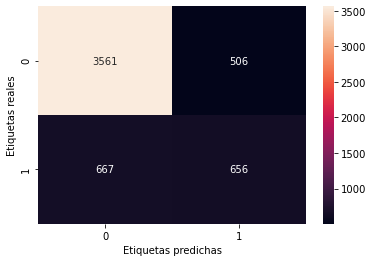

In [55]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True,fmt="d")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [56]:
from sklearn.metrics import recall_score
print(recall_score(Y_test, y_pred))

0.4958427815570673


In [57]:
confusion=confusion_matrix(Y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(specificity)

0.8755839685271699


In [58]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, y_pred))

0.5645438898450946


In [59]:
from sklearn.metrics import f1_score
print(f1_score(Y_test,y_pred))

0.5279678068410463


In [60]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test_transf)
fpr_log,tpr_log,thr_log = roc_curve(Y_test, y_pred_proba[:,1])

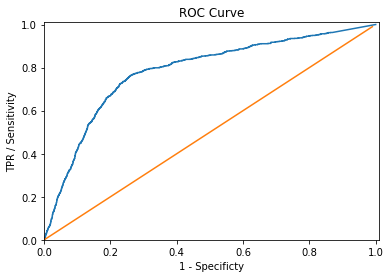

In [61]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [62]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.7824231350874367


In [63]:
df_scores.columns

Index(['score_medio', 'score_std', 'n_neighbors'], dtype='object')

In [64]:
neig=df_scores.n_neighbors
scores=df_scores.score_medio

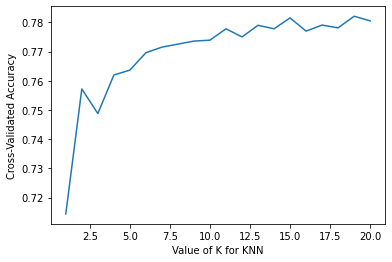

In [65]:
knn_range=range(1, 21)
plt.plot(neig, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [68]:
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [69]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='average_precision')

In [70]:
grid.fit(X_train_transf, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=19, weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='average_precision')

In [199]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=30)
0.5229637859274289
{'n_neighbors': 30, 'weights': 'uniform'}


In [210]:
# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors

knn = KNeighborsClassifier(n_neighbors=30, weights= 'uniform')

# Ajustamos a los datos de entrenamiento
knn.fit(X_train_transf, Y_train);

# Predecimos etiquetas para los datos de test
y_pred_30 = knn.predict(X_test_transf)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_30)

0.7855287569573284

In [211]:
print(recall_score(Y_test, y_pred_30))
print(precision_score(Y_test, y_pred_30))
print(f1_score(Y_test,y_pred_30))

0.4618291761148904
0.5791469194312796
0.5138772077375946


In [212]:
# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors

knn = KNeighborsClassifier(n_neighbors=150, weights= 'uniform')

# Ajustamos a los datos de entrenamiento
knn.fit(X_train_transf, Y_train);

# Predecimos etiquetas para los datos de test
y_pred_150 = knn.predict(X_test_transf)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred_150))
print(recall_score(Y_test, y_pred_150))
print(precision_score(Y_test, y_pred_150))
print(f1_score(Y_test,y_pred_150))

0.7929499072356215
0.491307634164777
0.5946935041171089
0.5380794701986755
